In [1]:
import pandas as pd
import yfinance as yf
from pandas_datareader import data
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import talib 
from dateutil.relativedelta import relativedelta
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np

from Tool_v1 import *


# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler  
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
yf.pdr_override()

In [2]:
from itertools import combinations
c = (1,2,3,4,5,6,7,8,9,10,11,12) 
i=0
result=[]
while i<len(c):
    for j in combinations(c,i):
        #print(list(j))
        result.append(list(j))
    i+=1 
print(len(result))

4095


In [3]:
start="2020-12-31"
end="2023-09-30"
name="AAPL"

#MACD619RSI21_8020
stock_data=pct_change(name,start,end)
stock_data=stock_data.copy()

#指标运算
stock_data=MACD_short(stock_data)
stock_data=RSI(stock_data)
stock_data=RSI_MACD(stock_data,21,80,20)
stock_data= my_rsi(stock_data, 21)

#y值
#stock_data["y"]=np.where(stock_data['Close'].shift(-1) > stock_data['Close'],1,-1)


del stock_data["real_situation"]
del stock_data["Volume"]
del stock_data["Adj Close"]
# del stock_data["RSI6"]
# del stock_data["RSI14"]
# del stock_data["re_close"]
# del stock_data["re_open"]
# del stock_data["Low"]
# del stock_data["log_return"] 
# del stock_data["up_or_down"]
# del stock_data["Close_price_percentage"]
# del stock_data["MACD"]
# del stock_data["DIF"]
# del stock_data["Position"]

stock_data = stock_data.dropna()


print(stock_data)

#y = np.where(stock_data['Close'].shift(-1) > stock_data['Close'],1,-1)

y = np.where(stock_data['Open'].shift(-1) > stock_data['Open'],1,-1)




                  Open        High         Low       Close  \
Date                                                         
2021-02-03  135.759995  135.770004  133.610001  133.940002   
2021-02-04  136.300003  137.399994  134.589996  137.389999   
2021-02-05  137.350006  137.419998  135.860001  136.759995   
2021-02-08  136.029999  136.960007  134.919998  136.910004   
2021-02-09  136.619995  137.880005  135.850006  136.009995   
...                ...         ...         ...         ...   
2023-09-25  174.199997  176.970001  174.149994  176.080002   
2023-09-26  174.820007  175.199997  171.660004  171.960007   
2023-09-27  172.619995  173.039993  169.050003  170.429993   
2023-09-28  169.339996  172.029999  167.619995  170.690002   
2023-09-29  172.020004  173.070007  170.339996  171.210007   

            Close_price_percentage  log_return  re_close   re_open  \
Date                                                                 
2021-02-03               -0.007778   -0.007809  0.152

In [4]:
#stock_data = stock_data.loc[:,["re_close", "re_open", "my_rsi", "Position", "RSI21", "up_or_down","y"]]
stock_data.head()

print(stock_data.iloc[:, [2,8,9,16]])

                   Low  up_or_down        EMA6      RSI21
Date                                                     
2021-02-03  133.610001           1  135.225705  54.368370
2021-02-04  134.589996           1  135.844075  57.348233
2021-02-05  135.860001           1  136.105766  56.639046
2021-02-08  134.919998           0  136.335548  56.772694
2021-02-09  135.850006           1  136.242533  55.691336
...                ...         ...         ...        ...
2023-09-25  174.149994           0  175.856228  44.853887
2023-09-26  171.660004           1  174.743022  40.668875
2023-09-27  169.050003           0  173.510728  39.241208
2023-09-28  167.619995           0  172.704806  39.619429
2023-09-29  170.339996           1  172.277721  40.398541

[669 rows x 4 columns]


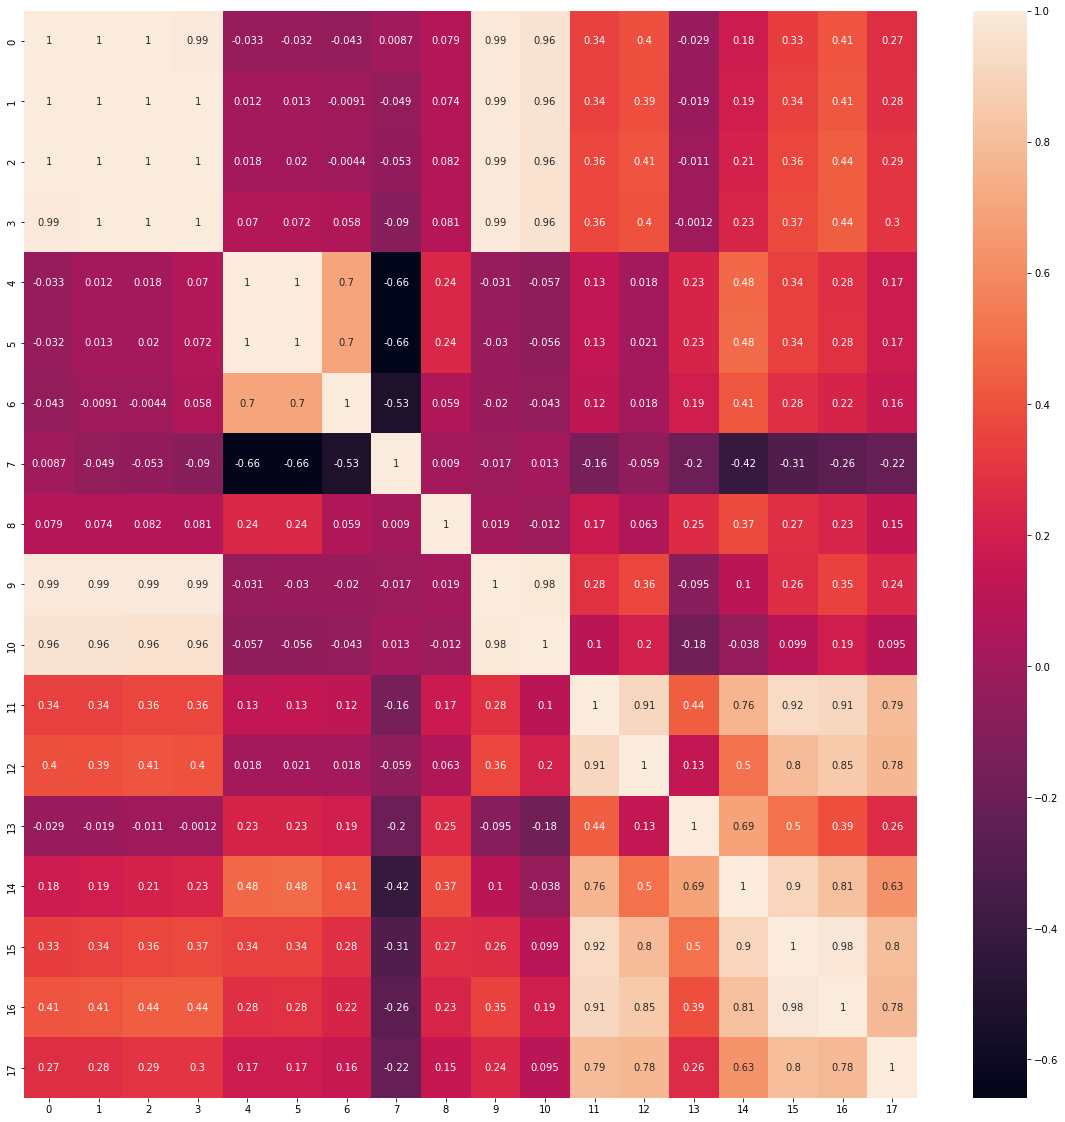

In [5]:

cor = np.corrcoef(stock_data.T)
plt.figure(figsize=(20, 20))
sns.heatmap(cor, annot=True)
plt.show()

In [6]:
#del stock_data["y"]
num_columns = stock_data.shape[1]+1
print(num_columns)

19


In [7]:
for i in range(1,num_columns):
    #standardScaler
    X = stock_data.iloc[:,:i]
    print(i,"features below:")
    print(X)
    st_x= StandardScaler()  
    X= st_x.fit_transform(X)  
    
    #split dataset
    split = int(0.7*len(stock_data))
    X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]
    
    # 设置正则化类型（L1, L2, Elastic Net）
    penalty = 'l2' 

    # 设置正则化强度（C）
    C = 0.005

    #logistic regression
    model = LogisticRegression(penalty =penalty, C=C) 
    #logistic regression
    #model = LogisticRegression(max_iter=20000)
    model = model.fit (X_train,y_train)
    probability = model.predict_proba(X_test)
    predicted = model.predict(X_test)
    

    
    #result
    #print(metrics.classification_report(y_test, predicted))
    #print(metrics.confusion_matrix(y_test, predicted)) 
    print(i,": ","model_score: ",model.score(X_test,y_test)," f1_score: ",f1_score(predicted, y_test)," accuary_score: ",accuracy_score(y_test,predicted))
    print()

1 features below:
                  Open
Date                  
2021-02-03  135.759995
2021-02-04  136.300003
2021-02-05  137.350006
2021-02-08  136.029999
2021-02-09  136.619995
...                ...
2023-09-25  174.199997
2023-09-26  174.820007
2023-09-27  172.619995
2023-09-28  169.339996
2023-09-29  172.020004

[669 rows x 1 columns]
1 :  model_score:  0.5074626865671642  f1_score:  0.48704663212435234  accuary_score:  0.5074626865671642

2 features below:
                  Open        High
Date                              
2021-02-03  135.759995  135.770004
2021-02-04  136.300003  137.399994
2021-02-05  137.350006  137.419998
2021-02-08  136.029999  136.960007
2021-02-09  136.619995  137.880005
...                ...         ...
2023-09-25  174.199997  176.970001
2023-09-26  174.820007  175.199997
2023-09-27  172.619995  173.039993
2023-09-28  169.339996  172.029999
2023-09-29  172.020004  173.070007

[669 rows x 2 columns]
2 :  model_score:  0.5174129353233831  f1_score:  0.512

12 :  model_score:  0.8606965174129353  f1_score:  0.8727272727272727  accuary_score:  0.8606965174129353

13 features below:
                  Open        High         Low       Close  \
Date                                                         
2021-02-03  135.759995  135.770004  133.610001  133.940002   
2021-02-04  136.300003  137.399994  134.589996  137.389999   
2021-02-05  137.350006  137.419998  135.860001  136.759995   
2021-02-08  136.029999  136.960007  134.919998  136.910004   
2021-02-09  136.619995  137.880005  135.850006  136.009995   
...                ...         ...         ...         ...   
2023-09-25  174.199997  176.970001  174.149994  176.080002   
2023-09-26  174.820007  175.199997  171.660004  171.960007   
2023-09-27  172.619995  173.039993  169.050003  170.429993   
2023-09-28  169.339996  172.029999  167.619995  170.690002   
2023-09-29  172.020004  173.070007  170.339996  171.210007   

            Close_price_percentage  log_return  re_close   re_open 

In [8]:


for i in range(1,num_columns):
    #normalization MinMaxScalar
    X = stock_data.iloc[:,:i]
    st_x= MinMaxScaler()   
    X= st_x.fit_transform(X)  
    
    
    #split dataset
    split = int(0.7*len(stock_data))
    X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]
    
    #logistic regression
    model = LogisticRegression(max_iter=20000)
    model = model.fit (X_train,y_train)
    probability = model.predict_proba(X_test)
    predicted = model.predict(X_test)
    #result
    #print(metrics.classification_report(y_test, predicted))
    #print(metrics.confusion_matrix(y_test, predicted)) 
    print(i,": ","model_score: ",model.score(X_test,y_test)," f1_score: ",f1_score(predicted, y_test)," accuary_score: ",accuracy_score(y_test,predicted))

1 :  model_score:  0.46766169154228854  f1_score:  0.38857142857142857  accuary_score:  0.46766169154228854
2 :  model_score:  0.4975124378109453  f1_score:  0.42937853107344637  accuary_score:  0.4975124378109453
3 :  model_score:  0.5174129353233831  f1_score:  0.4699453551912568  accuary_score:  0.5174129353233831
4 :  model_score:  0.7910447761194029  f1_score:  0.8090909090909091  accuary_score:  0.7910447761194029
5 :  model_score:  0.7860696517412935  f1_score:  0.8018433179723501  accuary_score:  0.7860696517412935
6 :  model_score:  0.7810945273631841  f1_score:  0.7962962962962964  accuary_score:  0.7810945273631841
7 :  model_score:  0.8308457711442786  f1_score:  0.8425925925925927  accuary_score:  0.8308457711442786
8 :  model_score:  0.845771144278607  f1_score:  0.8584474885844747  accuary_score:  0.845771144278607
9 :  model_score:  0.845771144278607  f1_score:  0.8584474885844747  accuary_score:  0.845771144278607
10 :  model_score:  0.845771144278607  f1_score:  0.858

In [9]:
#standardScaler
X = stock_data.iloc[:,:num_columns]
st_x= StandardScaler()  
X= st_x.fit_transform(X)  
    
#PCA
pca = PCA(n_components=2)
X = pca.fit_transform(X)
    
#split dataset
split = int(0.7*len(stock_data))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]
    
#logistic regression
model = LogisticRegression(max_iter=20000)
model = model.fit (X_train,y_train)
probability = model.predict_proba(X_test)
predicted = model.predict(X_test)
#result
#print(metrics.classification_report(y_test, predicted))
#print(metrics.confusion_matrix(y_test, predicted)) 
print("model_score: ",model.score(X_test,y_test)," f1_score: ",f1_score(predicted, y_test)," accuary_score: ",accuracy_score(y_test,predicted))

model_score:  0.681592039800995  f1_score:  0.6862745098039216  accuary_score:  0.681592039800995


In [10]:
#normalization MinMaxScalar
X = stock_data.iloc[:,:num_columns]
st_x= MinMaxScaler()   
X= st_x.fit_transform(X)  
    
#PCA
pca = PCA(n_components=2)
X = pca.fit_transform(X)
    
#split dataset
split = int(0.7*len(stock_data))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

#logistic regression
model = LogisticRegression(max_iter=20000)
model = model.fit (X_train,y_train)
probability = model.predict_proba(X_test)
predicted = model.predict(X_test)
#result
#print(metrics.classification_report(y_test, predicted))
#print(metrics.confusion_matrix(y_test, predicted)) 
print("model_score: ",model.score(X_test,y_test)," f1_score: ",f1_score(predicted, y_test)," accuary_score: ",accuracy_score(y_test,predicted))

model_score:  0.6019900497512438  f1_score:  0.6330275229357798  accuary_score:  0.6019900497512438


                  Open        High         Low       Close  \
Date                                                         
2021-02-03  135.759995  135.770004  133.610001  133.940002   
2021-02-04  136.300003  137.399994  134.589996  137.389999   
2021-02-05  137.350006  137.419998  135.860001  136.759995   
2021-02-08  136.029999  136.960007  134.919998  136.910004   
2021-02-09  136.619995  137.880005  135.850006  136.009995   
...                ...         ...         ...         ...   
2023-09-25  174.199997  176.970001  174.149994  176.080002   
2023-09-26  174.820007  175.199997  171.660004  171.960007   
2023-09-27  172.619995  173.039993  169.050003  170.429993   
2023-09-28  169.339996  172.029999  167.619995  170.690002   
2023-09-29  172.020004  173.070007  170.339996  171.210007   

            Close_price_percentage  log_return  re_close   re_open  \
Date                                                                 
2021-02-03               -0.007778   -0.007809  0.152

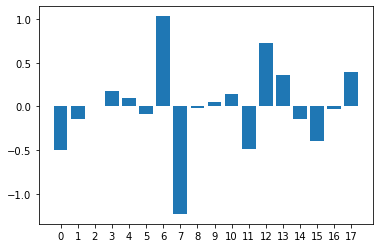

model_score:  0.845771144278607  f1_score:  0.8544600938967137  accuary_score:  0.845771144278607


In [11]:
#num_columns
X = stock_data.iloc[:,:num_columns]
print(X)
print(y)
st_x= StandardScaler()  
X= st_x.fit_transform(X)  
    
#split dataset
split = int(0.7*len(stock_data))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]
    
# # 设置正则化类型（L1, L2, Elastic Net）
# penalty = 'l2' 

# # 设置正则化强度（C）
# C = 0.005

# #logistic regression
# model = LogisticRegression(penalty =penalty, C=C) 

#logistic regression
model = LogisticRegression(max_iter=20000)
model = model.fit (X_train,y_train)
probability = model.predict_proba(X_test)
predicted = model.predict(X_test)
    
# get importance
importance = model.coef_[0]
print(importance)
# summarize feature importance
count=0
for i in importance:
    print('Score:%.d %.5f' % (count,i))
    count+=1
# plot feature importance
#plt.bar([x for x in range(len(importance))], importance)

plt.bar(range(len(importance)), importance)
plt.xticks(range(len(importance)), range(len(importance)))
plt.show()
    
#result
#print(metrics.classification_report(y_test, predicted))
#print(metrics.confusion_matrix(y_test, predicted)) 
print("model_score: ",model.score(X_test,y_test)," f1_score: ",f1_score(predicted, y_test)," accuary_score: ",accuracy_score(y_test,predicted))